# **Qutip qubit-oscillator**

# **Import Library**

In [1]:
from qutip import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [3]:
#menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 30               #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 2.5, 101)*2*np.pi #kuat interaksi

In [4]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

## **Variasi $\theta$**

### **Variasi $\theta = 0$**

In [5]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa* (-np.sin(0)*sx1 + np.cos(0)*sz1)      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

In [6]:
# Menghitung Hamiltonian
psi_list = []
E_list = []
for g in g_list:
    # Hamiltonian total
    H = Ho + Hq + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.eigenstates() 
    psi_list.append(eigen_state)
    E_list.append(eigen_energy/(2*np.pi))

In [7]:
# List energi berdasar tingkat eksitasi
E_level = []
for i in range(0,10):
    E = [item[i] for item in E_list]
    E_level.append(E)
    i +=1

### **Variasi $\theta = \pi/6$**

In [8]:
# Hamiltonian
Ho = wc * a.dag() * a     #osilator
Hq2 = 0.5 * wa* (np.sin(np.pi/6)*sx1 + np.cos(np.pi/6)*sz1)      #qubit


# Menghitung Hamiltonian
psi_list2 = []
E_list2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # Menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H2.eigenstates() 
    psi_list.append(eigen_state)
    E_list2.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level2 = []
for i in range(0,10):
    E = [item[i] for item in E_list2]
    E_level2.append(E)
    i +=1

### **Variasi $\theta$ = $\pi/3$**

In [9]:
# Hamiltonian
Ho = wc * a.dag() * a     #osilator
Hq3 = 0.5 * wa* (np.sin(np.pi/3)*sx1 + np.cos(np.pi/3)*sz1)      #qubit


# Menghitung Hamiltonian
psi_list3 = []
E_list3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H3.eigenstates() 
    psi_list.append(eigen_state)
    E_list3.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level3 = []
for i in range(0,10):
    E = [item[i] for item in E_list3]
    E_level3.append(E)
    i +=1

## **Plotting**

### **Lowest ten energy levels**

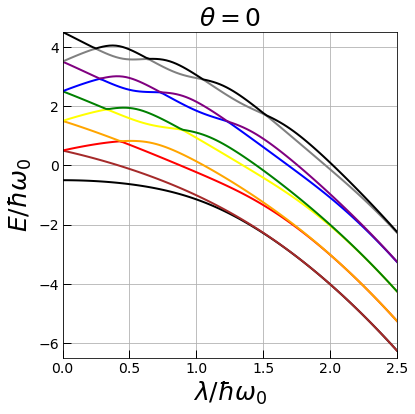

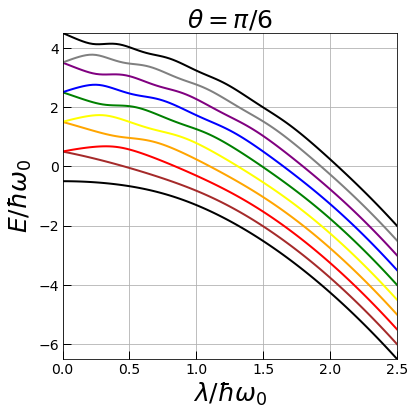

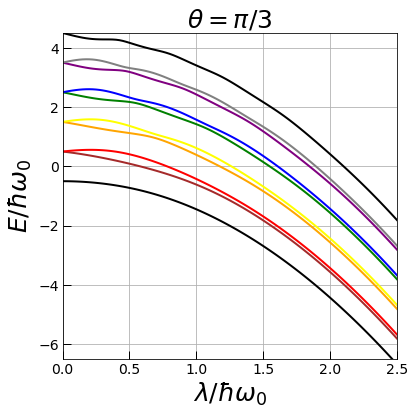

In [10]:
# Memplot nilai energi
# Plot variasi theta = 0
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 6))
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level[a], b[a], linewidth=2)
    a += 1

axes.set(xlim=(0, 2.5), ylim=(-6.5, 4.5))
axes.set_title(r"$\theta = 0$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)
axes.grid()
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

# Plot variasi theta = pi/6
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 6))
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level2[a], b[a], linewidth=2)
    a += 1

axes.set(xlim=(0, 2.5), ylim=(-6.5, 4.5))
axes.set_title(r"$\theta = \pi/6$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)
axes.grid()
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

# Plot variasi theta = pi/3
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 6))
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level3[a], b[a], linewidth=2)
    a += 1

axes.set(xlim=(0, 2.5), ylim=(-6.5, 4.5))
axes.set_title(r"$\theta = \pi/3$", fontsize=25)
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)
axes.grid('green')
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

### **The separation between the lowest two energy levels**

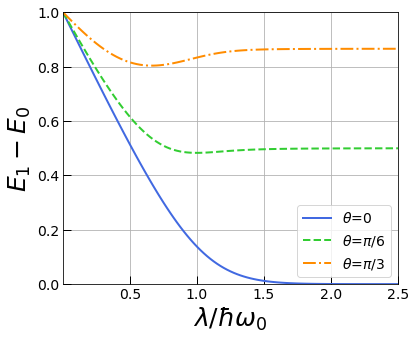

In [19]:
# Merubah input energi (variasi theta = 0)
E1 = E_level[1]
E0 = E_level[0]
E1E0 = []
for i in range(len(E1)):
    E1E0.append(E1[i]-E0[i])

# Merubah input energi (variasi theta = pi/6)
E1_2 = E_level2[1]
E0_2 = E_level2[0]
E1E0_2 = []
for i in range(len(E1_2)):
    E1E0_2.append(E1_2[i]-E0_2[i])

# Merubah input energi (variasi theta = pi/3)
E1_3 = E_level3[1]
E0_3 = E_level3[0]
E1E0_3 = []
for i in range(len(E1_3)):
    E1E0_3.append(E1_3[i]-E0_3[i])
  

# Memplot nilai energi
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), E1E0, 'royalblue', linewidth=2, label='$\\theta$=0')
axes.plot(g_list/(2*np.pi), E1E0_2, 'limegreen', linewidth=2, linestyle='dashed', label='$\\theta$=$\pi$/6')
axes.plot(g_list/(2*np.pi), E1E0_3, 'darkorange', linewidth=2, linestyle='-.', label='$\\theta$=$\pi$/3')
axes.set(xlim=(0.001, 2.5), ylim=(0, 1))
axes.set_ylabel(r"$E_1 - E_0$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)
axes.grid()
axes.legend(loc=4, fontsize=14)
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)

In [12]:
# Membuat grafik Logaritma
i1 = np.where(g_list==0.)     #menghilangkan data 0 yang tidak bisa dioperasikan logaritma
newG = np.delete(g_list, i1)
 
# Logaritma E variasi theta = 0
arrayE = np.array(E1E0)      #menyesuaikan E terhadap parameter g yang dihilangkan
i2 = np.where(arrayE==1.0)
newE = np.delete(arrayE, i2)
 
logGlist = []                 #melakukan operasi logaritma pada g
for x in range(len(newG)):
    logGlist.append(math.log10(newG[x]/(2*np.pi)))
logElist = []
for y in range(len(newE)):    #melakukan operasi logaritma pada E
    logElist.append(math.log10(-1*math.log10(newE[y])))
 
# Logaritma E variasi theta = pi/6
arrayE_2 = np.array(E1E0_2)      #menyesuaikan E terhadap parameter g yang dihilangkan
i2_2 = np.where(arrayE_2==0.9999999999999996)
newE2 = np.delete(arrayE_2, i2_2)
 
logElist2 = []
for y in range(len(newE2)):    # melakukan operasi logaritma pada E
    logElist2.append(math.log10(-math.log10(newE2[y])))
 
# Logaritma E variasi theta = pi/3
arrayE_3 = np.array(E1E0_3)      # menyesuaikan E terhadap parameter g yang dihilangkan
i2_3 = np.where(arrayE_3==0.9999999999999992)
newE3 = np.delete(arrayE_3, i2_3)
 
logElist3 = []
for y in range(len(newE3)):    #melakukan operasi logaritma pada E
    logElist3.append(math.log10(-math.log10(newE3[y])))

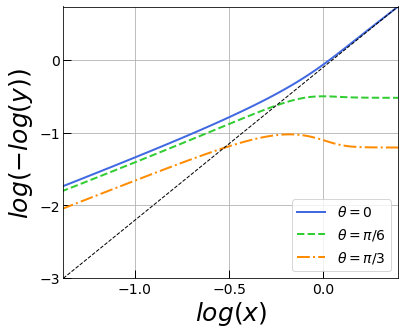

In [18]:
# Memplot data logaritma
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))
axes.set_xticks(np.arange(-2, logGlist[len(logGlist)-1], 0.5))
axes.set_yticks(np.arange(-3, logGlist[len(logElist)-1], 1))
 
axes.plot(logGlist, logElist, 'royalblue', linewidth=2, label='$\\theta=0$')
axes.plot(logGlist, logElist2, 'limegreen', linewidth=2, linestyle='dashed', label='$\\theta=\pi/6$')
axes.plot(logGlist, logElist3, 'darkorange', linewidth=2, linestyle='-.', label='$\\theta=\pi/3$')
axes.plot([-1.38, logGlist[len(logGlist)-1]], [-3, logElist[len(logElist)-1]],'black', linewidth=1, linestyle='--')
 
axes.set(xlim=(-1.38, logGlist[len(logGlist)-1]), ylim=(-3, logElist[len(logElist)-1]))
axes.set_ylabel(r"$log(-log(y))$", fontsize=25)
axes.set_xlabel(r"$log(x)$", fontsize=25)
axes.grid(True)
axes.legend(loc=4, fontsize=14)
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)